<a href="https://colab.research.google.com/github/LizaYemini/Pix2Pix_GAN_On_Statue/blob/main/Pix2Pix_GAN_On_Statue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# check python version
!python --version

Python 3.7.10


# Preprocessing - get the data and ready it

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account:https://www.kaggle.com/username/account , Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

In [4]:
! pip install -q kaggle

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
 from google.colab import files
 #upload the api token (kaggle.json)
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lizayemini","key":"6b1752e2112d584eeb30860df31a018b"}'}

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-10 08:12:55           2355  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1367  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1038  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            226  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [8]:
!kaggle datasets download ytrivedi1/sculptures --force

 99% 196M/198M [00:01<00:00, 132MB/s]
100% 198M/198M [00:01<00:00, 146MB/s]


In [9]:
#Ay to get everything again
!unzip sculptures.zip

Archive:  sculptures.zip
  inflating: sculptureGas/test/101.jpg  
  inflating: sculptureGas/test/111.jpg  
  inflating: sculptureGas/test/113.jpg  
  inflating: sculptureGas/test/136.jpg  
  inflating: sculptureGas/test/146 18.59.45.jpg  
  inflating: sculptureGas/test/155.jpg  
  inflating: sculptureGas/test/18.jpg  
  inflating: sculptureGas/test/198.png  
  inflating: sculptureGas/test/199.jpg  
  inflating: sculptureGas/test/2.jpg  
  inflating: sculptureGas/test/215.jpg  
  inflating: sculptureGas/test/224.png  
  inflating: sculptureGas/test/241.jpg  
  inflating: sculptureGas/test/249.jpg  
  inflating: sculptureGas/test/251.jpg  
  inflating: sculptureGas/test/26.jpg  
  inflating: sculptureGas/test/27.jpg  
  inflating: sculptureGas/test/278.jpg  
  inflating: sculptureGas/test/288.jpeg  
  inflating: sculptureGas/test/290.jpg  
  inflating: sculptureGas/test/292.jpg  
  inflating: sculptureGas/test/294.jpg  
  inflating: sculptureGas/test/302.jpg  
  inflating: sculptureGas/t

In [10]:
def show(im):
  # show image
  plt.figure()
  plt.imshow(im)
  plt.show()

In [11]:
#create new folders
!mkdir data
#pic
!mkdir data/testB
#paint
!mkdir data/testA
#pic
!mkdir data/valB
#paint
!mkdir data/valA
#pic
!mkdir data/trainB
#paint
!mkdir data/trainA

In [12]:
def crop_all(org_dir, test_flag, limit, half_width=256):
  num_made = 0
  for dirname, _, filenames in os.walk('sculptureGas/' + org_dir):
      for filename in filenames:
          path = os.path.join(dirname, filename)
          name = os.path.splitext(filename)[0]
          img = Image.open(path)
          #split in two
          w, h = img.size
          #don't take it if sizes are less then 130x130
          if w < (half_width*2) or h < (half_width*2):
            continue
          #(left, top, right, bottom)
          pic = img.crop((1, 1, int(w/2), h))
          paint = img.crop((int(w/2), 1, w, h))
          # 1/5 to val, 4/5 for train
          if (not test_flag) and (num_made % 5 == 0):
            newPathPic = 'data/' + 'valB' + '/' + name + '_pic' + '.png'
            newPathPaint = 'data/' + 'valA' + '/' + name + '_paint' + '.png'
          elif (not test_flag):
            newPathPic = 'data/' + 'trainB' + '/' + name + '_pic' + '.png'
            newPathPaint = 'data/' + 'trainA' + '/' + name + '_paint' + '.png'
          else:
            newPathPic = 'data/' + 'testB' + '/' + name + '_pic' + '.png'
            newPathPaint = 'data/' + 'testA' + '/' + name + '_paint' + '.png'
          pic.save(newPathPic)
          paint.save(newPathPaint)
          #imgPic = plt.imread(newPath)
          #show(imgPic)
 
          #crop to resize
          w, h = pic.size
          pic = pic.crop((int(w/2)-half_width, int(h/2)-half_width, int(w/2)+half_width, int(h/2)+half_width))
          pic = pic.convert('LA')
          #blw(pic) # convert image to black and white (grayscale)
          paint = paint.crop((int(w/2)-half_width, int(h/2)-half_width, int(w/2)+half_width, int(h/2)+half_width))
          pic.save(newPathPic)
          paint.save(newPathPaint)
          imgPic = plt.imread(newPathPic)
          #show(imgPic)
          imgPaint = plt.imread(newPathPaint)
          #show(imgPaint)
          num_made += 1
          if(limit != -1):
            limit -= 1
            if limit == 0:
              break
  print("number of examples made: ", num_made)

In [13]:
crop_all('test', True, -1, half_width = 128)   #65: 191, 70: 191, 256: 30.
crop_all('train', False, -1, half_width = 128) #65: 1737, 70: 1733, 256: 197. and val from 1/5 of the data

number of examples made:  190
number of examples made:  1689


In [14]:
def get_all(path, lst):
  for dirname, _, filenames in os.walk('path'):
      for filename in filenames:
          path = os.path.join(dirname, filename)
          lst.append()
          img = plt.imread(path)
          show(img)
#get_all('/sculptureGas', [])

now we have data folder and in it a test_paint, test_pic, train_paint, train_pic folders and in them the images are all (half_width*2)*(half_width*2)  pxl.

In [15]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
# load all images in a directory into memory
def load_images(path_trainA, path_trainB, size=(256,256)):
  src_list, tar_list = list(), list()
  # enumerate filenames in directory, assume all are images
  for filename in listdir(path_trainA):
    # load and resize the image
    pixels1 = load_img(path_trainA + filename, target_size=size)
    pixels2 = load_img(path_trainB + filename.replace("paint","pic"), target_size=size)
    # convert to numpy array
    pixels1 = img_to_array(pixels1)
    pixels2 = img_to_array(pixels2)
    src_list.append(pixels1)
    tar_list.append(pixels2)
  return [asarray(src_list), asarray(tar_list)]

In [16]:
# dataset path
path_trainA = 'data/trainA/'
path_trainB = 'data/trainB/'
# load dataset
[src_images, tar_images] = load_images(path_trainA, path_trainB)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'statue_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved training dataset: ', filename)

# eval dataset path
path_evalA = 'data/valA/'
path_evalB = 'data/valB/'
# load eval dataset
[src_images_eval, tar_images_eval] = load_images(path_evalA, path_evalB)
print('Loaded: ', src_images_eval.shape, tar_images_eval.shape)
# save as compressed numpy array
filename_eval = 'statue_256_eval.npz'
savez_compressed(filename_eval, src_images_eval, tar_images_eval)
print('Saved evaluation dataset: ', filename_eval)

Loaded:  (1351, 256, 256, 3) (1351, 256, 256, 3)
Saved training dataset:  statue_256.npz
Loaded:  (338, 256, 256, 3) (338, 256, 256, 3)
Saved evaluation dataset:  statue_256_eval.npz


We can then plot some images pairs to confirm the data has been handled correctly

Loaded:  (1351, 256, 256, 3) (1351, 256, 256, 3)


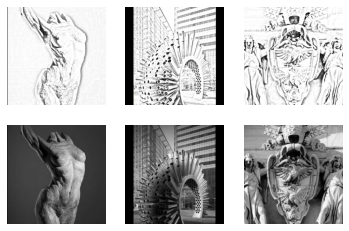

In [17]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('statue_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

# Discriminator Model




In [18]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

# Generator Model

In [19]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g
 
# define the standalone generator model
def define_generator(image_shape=(130,130,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# Combined generator and discriminator model

In [20]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [21]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,130] to [-1,1]
	X1 = (X1 - 65) / 65
	X2 = (X2 - 65) / 65
	return [X1, X2]

In [22]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [23]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [24]:
from numpy import uint8
# generate samples and save as a plot and save the model
def summarize_performance(epoch, g_model, X_realA, X_realB, title, n_samples=5):
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	#print("example from train dataset:")
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	title1 = title + ' Sketch picture'
	pyplot.title(title1, loc="left")
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	title2 = title + ' Generated sculpture picture'
	pyplot.title(title2, loc="left")
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	title3 = title + ' Real target sculpture picture'
	pyplot.title(title3, loc="left")
	# save plot to file
	filename1 = title + '_plot_%02d.png' % (epoch)
	pyplot.savefig(filename1)
	pyplot.show()
	pyplot.close()
	# save the generator model
	filename2 = 'model_%02d.h5' % (epoch)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# Train

In [25]:
# train pix2pix model
def train(d_model, g_model, gan_model, dataset, dataset_eval, n_samples=5,  n_epochs=30, n_batch=1, device="cuda"):
  # select a sample of input images from train
  [X_realA_train, X_realB_train], _ = generate_real_samples(dataset, n_samples, 1)
  # select a sample of input images from evaluation
  [X_realA_eval, X_realB_eval], _ = generate_real_samples(dataset_eval, n_samples, 1)
  # Track loss history
  losses = []
  # determine the output square shape of the discriminator
  n_patch = d_model.output_shape[1]
  # unpack dataset
  trainA, trainB = dataset
  # calculate the number of batches per training epoch
  bat_per_epo = int(len(trainA) / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # manually enumerate epochs
  for epoch in range(1, n_epochs + 1):
    #print('Epoch %d: ' % epoch)
    for i in range(bat_per_epo):
      # select a batch of real samples
      [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
      # generate a batch of fake samples
      X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
      # update discriminator for real samples
      d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
      # update discriminator for generated samples
      d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
      # update the generator
      g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
	  # summarize performance
    print('>Epoch %d, Disc Loss on real samples:[%.3f] Disc Loss on fake samples: [%.3f] Gen Loss:[%.3f]' % (epoch, d_loss1, d_loss2, g_loss))
    losses.append((d_loss1, d_loss2, g_loss))
    if (epoch % 5 == 0):
        print("Showing both evaluation and train examples:")
        summarize_performance(epoch, g_model, X_realA_train, X_realB_train, "train", n_samples=n_samples)
        summarize_performance(epoch, g_model, X_realA_eval, X_realB_eval, "evaluation", n_samples=n_samples)
  #summarize_performance(n_epochs, g_model, dataset)
  return losses

Loaded (1351, 256, 256, 3) (1351, 256, 256, 3)
(256, 256, 3)
>Epoch 1, Disc Loss on real samples:[0.594] Disc Loss on fake samples: [0.046] Gen Loss:[28.730]
>Epoch 2, Disc Loss on real samples:[0.004] Disc Loss on fake samples: [0.009] Gen Loss:[112.480]
>Epoch 3, Disc Loss on real samples:[0.002] Disc Loss on fake samples: [0.084] Gen Loss:[53.101]
>Epoch 4, Disc Loss on real samples:[0.004] Disc Loss on fake samples: [0.011] Gen Loss:[93.426]
>Epoch 5, Disc Loss on real samples:[0.003] Disc Loss on fake samples: [0.013] Gen Loss:[60.037]
Showing both evaluation and train examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

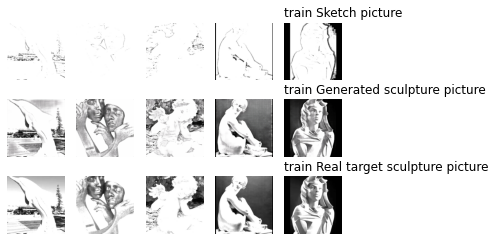

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: train_plot_05.png and model_05.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


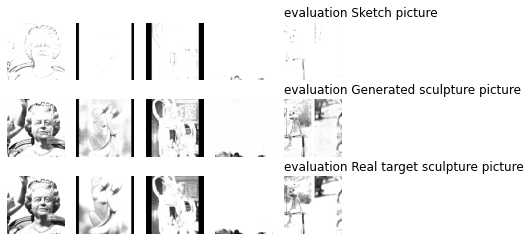

>Saved: evaluation_plot_05.png and model_05.h5
>Epoch 6, Disc Loss on real samples:[0.002] Disc Loss on fake samples: [0.012] Gen Loss:[71.001]
>Epoch 7, Disc Loss on real samples:[0.028] Disc Loss on fake samples: [0.031] Gen Loss:[41.932]
>Epoch 8, Disc Loss on real samples:[0.060] Disc Loss on fake samples: [0.039] Gen Loss:[110.118]
>Epoch 9, Disc Loss on real samples:[0.005] Disc Loss on fake samples: [0.022] Gen Loss:[50.735]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Epoch 10, Disc Loss on real samples:[0.049] Disc Loss on fake samples: [0.469] Gen Loss:[25.848]
Showing both evaluation and train examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


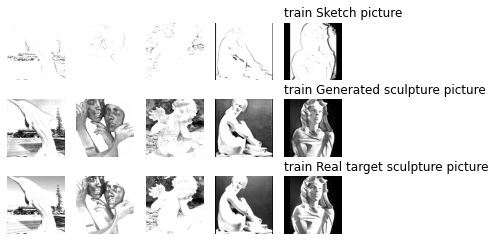

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: train_plot_10.png and model_10.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


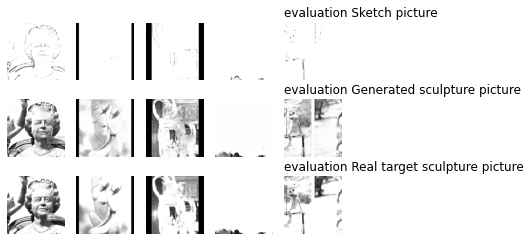

>Saved: evaluation_plot_10.png and model_10.h5
>Epoch 11, Disc Loss on real samples:[0.017] Disc Loss on fake samples: [0.028] Gen Loss:[115.479]
>Epoch 12, Disc Loss on real samples:[0.014] Disc Loss on fake samples: [0.021] Gen Loss:[17.112]
>Epoch 13, Disc Loss on real samples:[0.011] Disc Loss on fake samples: [0.022] Gen Loss:[39.406]
>Epoch 14, Disc Loss on real samples:[0.010] Disc Loss on fake samples: [0.027] Gen Loss:[43.824]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Epoch 15, Disc Loss on real samples:[0.015] Disc Loss on fake samples: [0.029] Gen Loss:[42.951]
Showing both evaluation and train examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


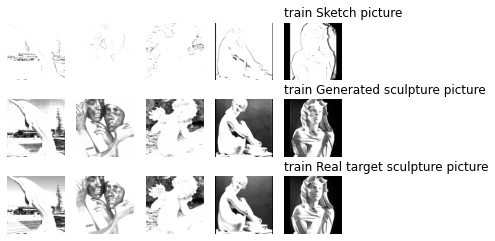

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: train_plot_15.png and model_15.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


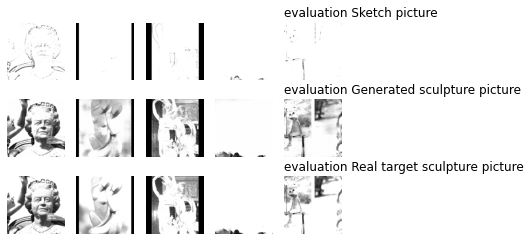

>Saved: evaluation_plot_15.png and model_15.h5
>Epoch 16, Disc Loss on real samples:[0.016] Disc Loss on fake samples: [0.030] Gen Loss:[67.324]
>Epoch 17, Disc Loss on real samples:[0.016] Disc Loss on fake samples: [0.025] Gen Loss:[102.983]
>Epoch 18, Disc Loss on real samples:[0.012] Disc Loss on fake samples: [0.019] Gen Loss:[33.540]
>Epoch 19, Disc Loss on real samples:[0.009] Disc Loss on fake samples: [0.019] Gen Loss:[52.947]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Epoch 20, Disc Loss on real samples:[0.010] Disc Loss on fake samples: [0.040] Gen Loss:[90.673]
Showing both evaluation and train examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


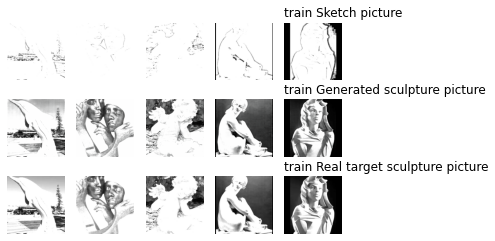

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: train_plot_20.png and model_20.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


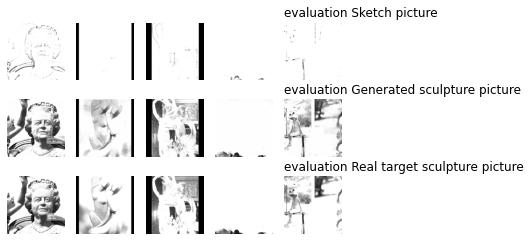

>Saved: evaluation_plot_20.png and model_20.h5
>Epoch 21, Disc Loss on real samples:[0.008] Disc Loss on fake samples: [0.019] Gen Loss:[41.772]
>Epoch 22, Disc Loss on real samples:[0.010] Disc Loss on fake samples: [0.020] Gen Loss:[55.005]
>Epoch 23, Disc Loss on real samples:[0.011] Disc Loss on fake samples: [0.028] Gen Loss:[30.115]
>Epoch 24, Disc Loss on real samples:[0.008] Disc Loss on fake samples: [0.023] Gen Loss:[35.953]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Epoch 25, Disc Loss on real samples:[0.010] Disc Loss on fake samples: [0.031] Gen Loss:[31.809]
Showing both evaluation and train examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


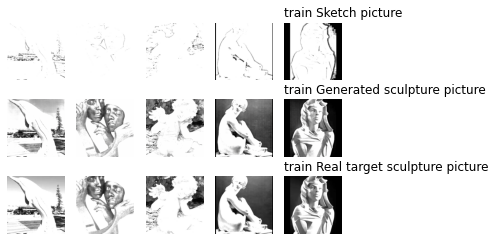

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: train_plot_25.png and model_25.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


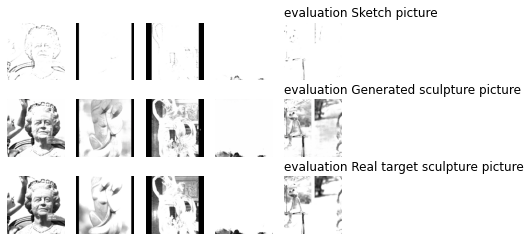

>Saved: evaluation_plot_25.png and model_25.h5
>Epoch 26, Disc Loss on real samples:[0.033] Disc Loss on fake samples: [0.056] Gen Loss:[29.727]
>Epoch 27, Disc Loss on real samples:[0.010] Disc Loss on fake samples: [0.021] Gen Loss:[36.887]
>Epoch 28, Disc Loss on real samples:[0.009] Disc Loss on fake samples: [0.021] Gen Loss:[46.343]
>Epoch 29, Disc Loss on real samples:[0.005] Disc Loss on fake samples: [0.014] Gen Loss:[17.618]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Epoch 30, Disc Loss on real samples:[0.005] Disc Loss on fake samples: [0.013] Gen Loss:[48.167]
Showing both evaluation and train examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


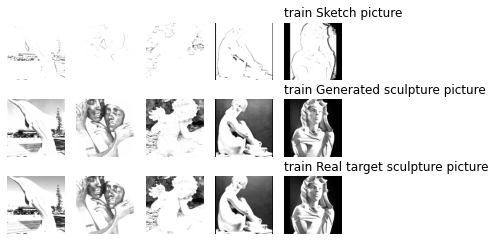

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: train_plot_30.png and model_30.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


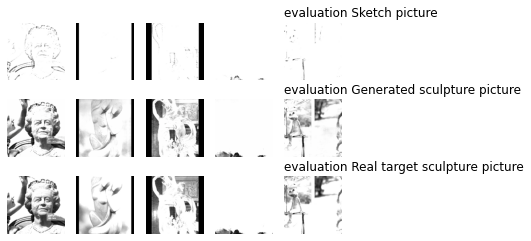

>Saved: evaluation_plot_30.png and model_30.h5


In [26]:
# load image data
dataset = load_real_samples('statue_256.npz')
dataset_eval = load_real_samples('statue_256_eval.npz')

print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
print(dataset[0].shape[1:])
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
loss_history = train(d_model, g_model, gan_model, dataset, dataset_eval)

**Plot the loss as a function of #epochs:**

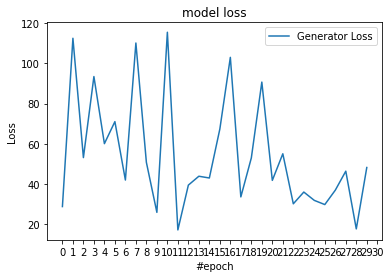

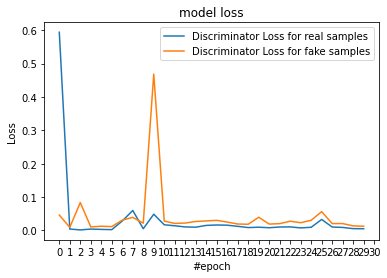

' loss history example\n[[2.56893924e-03 1.13464370e-02 5.93379250e+01]\n [6.33340701e-03 2.66370121e-02 4.49986839e+01]\n [7.39080971e-03 1.45485615e-02 5.14950142e+01]\n [2.61842133e-03 1.07920859e-02 4.98451920e+01]\n [2.19457503e-03 9.07975622e-03 6.29144173e+01]]\n '

In [27]:
import numpy as np
from matplotlib import pyplot as plt
loss_history = np.array(loss_history)
T = np.transpose(loss_history)
#print(T)
#print(T[0])
#plt.plot(T[0], label='Discriminator Loss for real samples')
#plt.plot(T[1], label='Discriminator Loss for fake samples')
plt.plot(T[2], label='Generator Loss')
plt.title('model loss')
plt.xlabel("#epoch")
plt.xticks(range(len(T[0])+1))
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(T[0], label='Discriminator Loss for real samples')
plt.plot(T[1], label='Discriminator Loss for fake samples')
#plt.plot(T[2], label='Generator Loss')
plt.title('model loss')
plt.xlabel("#epoch")
plt.xticks(range(len(T[0])+1))
plt.ylabel("Loss")
plt.legend()
#plt.legend(['Disc real', 'Disc fake'], loc='upper left')
plt.show()

''' loss history example
[[2.56893924e-03 1.13464370e-02 5.93379250e+01]
 [6.33340701e-03 2.66370121e-02 4.49986839e+01]
 [7.39080971e-03 1.45485615e-02 5.14950142e+01]
 [2.61842133e-03 1.07920859e-02 4.98451920e+01]
 [2.19457503e-03 9.07975622e-03 6.29144173e+01]]
 '''

# Test- final test on an unseen example from the test dataset

In [28]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# load num images in a directory into memory
def load_less_images(path_A, path_B, num, size=(256,256)):
  src_list, tar_list = list(), list()
  # enumerate filenames in directory, assume all are images
  i = 0
  for filename in listdir(path_A):
    # load and resize the image
    pixels1 = load_img(path_A + filename, target_size=size)
    pixels2 = load_img(path_B + filename.replace("paint","pic"), target_size=size)
    # convert to numpy array
    pixels1 = img_to_array(pixels1)
    pixels2 = img_to_array(pixels2)
    # scale from [0,255] to [-1,1]
    pixels1 = (pixels1 - 127.5) / 127.5
	  # reshape to 1 sample
    #pixels1 = expand_dims(pixels1, 0)
    src_list.append(pixels1)
    tar_list.append(pixels2)
    i += 1
    if (i == num):
      break
  return [asarray(src_list), asarray(tar_list)]

Loaded:  (256, 256, 3) (256, 256, 3)
images shape:  (5, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

gen images shape:  (256, 256, 3)


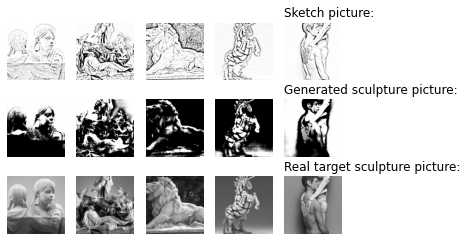

In [29]:
from keras import models
n_samples = 5
# dataset path
path_A = 'data/testA/'
path_B = 'data/testB/'
# load dataset
images =  load_less_images(path_A, path_B, n_samples)
print('Loaded: ',images[0][0].shape, images[1][0].shape)
print("images shape: ", images[0].shape)
#print("image shape: ", image[0].shape)
# load model
model = models.load_model('model_30.h5', compile=False) #change here to 1 to try epoch 1, etc.
#for image in images:
#  im = image[:3]
gen_images = model.predict(images[0])
print("gen images shape: ", gen_images[0].shape)

# scale from [-1,1] to [0,1]
#gen_image = (gen_image + 1) / 2.0

# plot painted image:
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(images[0][i])#.astype('uint8'))
pyplot.title('Sketch picture:', loc="left")
# plot generated image:
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(gen_images[i])#.astype('uint8'))
pyplot.title('Generated sculpture picture:', loc="left")
# plot target image:
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
	pyplot.axis('off')
	pyplot.imshow(images[1][i].astype('uint8'))
pyplot.title('Real target sculpture picture:', loc="left")
pyplot.show()